In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("coronavirus-data/by-boro.csv")

In [4]:
df.shape

(6, 7)

In [5]:
df

,BOROUGH_GROUP,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,Bronx,3048.04,799.30,239.29,43652,11447,3427
1,Brooklyn,2034.63,527.99,190.57,52551,13637,4922
2,Manhattan,1466.26,456.19,134.59,23881,7430,2192
3,Queens,2596.60,699.59,211.77,59174,15943,4826
4,StatenIsland,2733.64,463.06,162.54,13017,2205,774
5,Citywide,2290.51,603.52,192.33,192374,50688,16153


In [15]:
result = df["DEATH_COUNT"]/df["CASE_COUNT"]
result.index = df["BOROUGH_GROUP"]
result

BOROUGH_GROUP
Bronx           0.078507
Brooklyn        0.093661
Manhattan       0.091788
Queens          0.081556
StatenIsland    0.059461
Citywide        0.083967
dtype: float64

In [9]:
df = pd.read_csv("coronavirus-data/by-age.csv")

In [13]:
result = df["DEATH_COUNT"]/df["CASE_COUNT"]
result.index = df["AGE_GROUP"]
result

AGE_GROUP
0-17        0.001972
18-44       0.009041
45-64       0.051704
65-74       0.168114
75+         0.348490
Citywide    0.083967
dtype: float64

In [16]:
df = pd.read_csv("coronavirus-data/by-sex.csv")

In [18]:
result = df["DEATH_COUNT"] / df["CASE_COUNT"]
result.index = df["SEX_GROUP"]
result

SEX_GROUP
Female      0.068039
Male        0.098744
Citywide    0.083967
dtype: float64

In [19]:
df = pd.read_csv("coronavirus-data/by-poverty.csv")

In [21]:
result = df["DEATH_COUNT"] / df["CASE_COUNT"]
result.index = df["POVERTY_GROUP"]
result

POVERTY_GROUP
Low poverty          0.071343
Medium poverty       0.085031
High poverty         0.097691
Very high poverty    0.085830
dtype: float64

In [22]:
df = pd.read_csv("coronavirus-data/by-race.csv")

In [24]:
result = df["DEATH_COUNT"] / df["CASE_COUNT"]
result.index = df["RACE_GROUP"]
result

RACE_GROUP
Asian/Pacific-Islander    0.164250
Black/African-American    0.147279
Hispanic/Latino           0.152931
White                     0.138189
dtype: float64

In [26]:
df = pd.read_csv("coronavirus-data/case-hosp-death.csv")

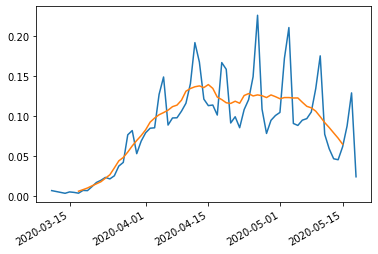

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = []
dates = []
result2 = []
for index, row in df.iterrows():
    if row["DEATH_COUNT"] == 0:
        continue
    result.append(row["DEATH_COUNT"]/row["CASE_COUNT"])
    result2.append(row["DEATH_COUNT"])
    dates.append(row["DATE_OF_INTEREST"])
result = pd.Series(result)
result.index = pd.to_datetime(dates)
result2 = pd.Series(result2)
result2.index = pd.to_datetime(dates)
result.plot()
seasonal_decompose(result.iloc[1:]).trend.plot()

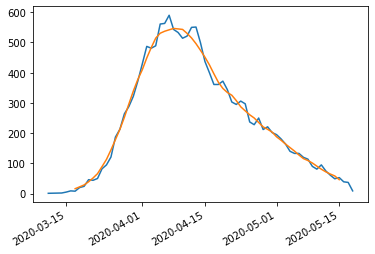

In [66]:
result2.plot()
seasonal_decompose(result2.iloc[1:]).trend.plot()